In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

tf.random.set_seed(42)
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/Data/Mean11.csv'
SensorData = pd.read_csv(filename)

In [2]:
SensorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230388 entries, 0 to 230387
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sx00    230388 non-null  float64
 1   Sx01    230388 non-null  float64
 2   Sx02    230388 non-null  float64
 3   Sx03    230388 non-null  float64
 4   Sx04    230388 non-null  float64
 5   Sx05    230388 non-null  float64
 6   Sx06    230388 non-null  float64
 7   Sx07    230388 non-null  float64
 8   Sx08    230388 non-null  float64
 9   Sx09    230388 non-null  float64
 10  r       230388 non-null  float64
 11  theta   230388 non-null  float64
 12  z       230388 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 22.9 MB


In [3]:
SensorData.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,z
count,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000,230388.000000
mean,28.436346,30.934143,30.023162,30.818578,26.004307,30.935326,30.018384,32.352401,29.752301,31.563975,0.900163,175.002746,18.000525
std,1.386976,1.901363,2.051858,2.184350,2.692666,1.860701,1.755394,2.350203,1.434969,1.579572,0.578072,103.880002,11.489021
min,20.090000,18.730000,12.820000,13.820000,13.730000,0.000000,14.820000,16.090000,21.000000,19.820000,0.000000,0.000000,0.000000
25%,27.640000,30.090000,29.820000,30.270000,24.270000,30.000000,29.360000,31.180000,29.000000,30.640000,0.400000,90.000000,8.000000
50%,28.450000,31.180000,30.360000,31.180000,25.820000,31.090000,30.270000,32.640000,29.910000,31.640000,1.000000,180.000000,20.000000
75%,29.360000,32.090000,30.910000,32.000000,27.910000,32.000000,31.090000,33.910000,30.640000,32.640000,1.400000,262.500000,28.000000
max,33.450000,36.270000,34.000000,36.270000,34.820000,36.450000,34.820000,39.360000,34.640000,37.270000,31.910000,350.000000,36.000000


In [4]:
SensorData.sample(5)

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,z
176098,26.55,29.91,31.09,27.91,22.64,29.55,31.55,35.82,29.64,30.36,0.2,230.0,28
14060,29.09,23.36,32.36,29.82,32.27,29.00,30.73,33.18,28.45,31.36,1.8,210.0,0
182537,26.18,32.36,30.73,30.73,27.64,28.91,30.55,32.45,29.73,32.36,0.4,330.0,28
187786,27.91,32.45,30.00,31.45,23.18,30.27,31.36,30.27,25.82,32.18,0.8,50.0,32
44179,29.27,30.55,30.18,31.18,24.09,31.64,31.45,34.45,29.00,31.36,0.0,330.0,4


In [5]:
SensorData_extractZ = SensorData[SensorData['z']==36]
mask = SensorData_extractZ['r'].isin([0,0.2])
SensorData_extractZR = SensorData_extractZ[~mask]

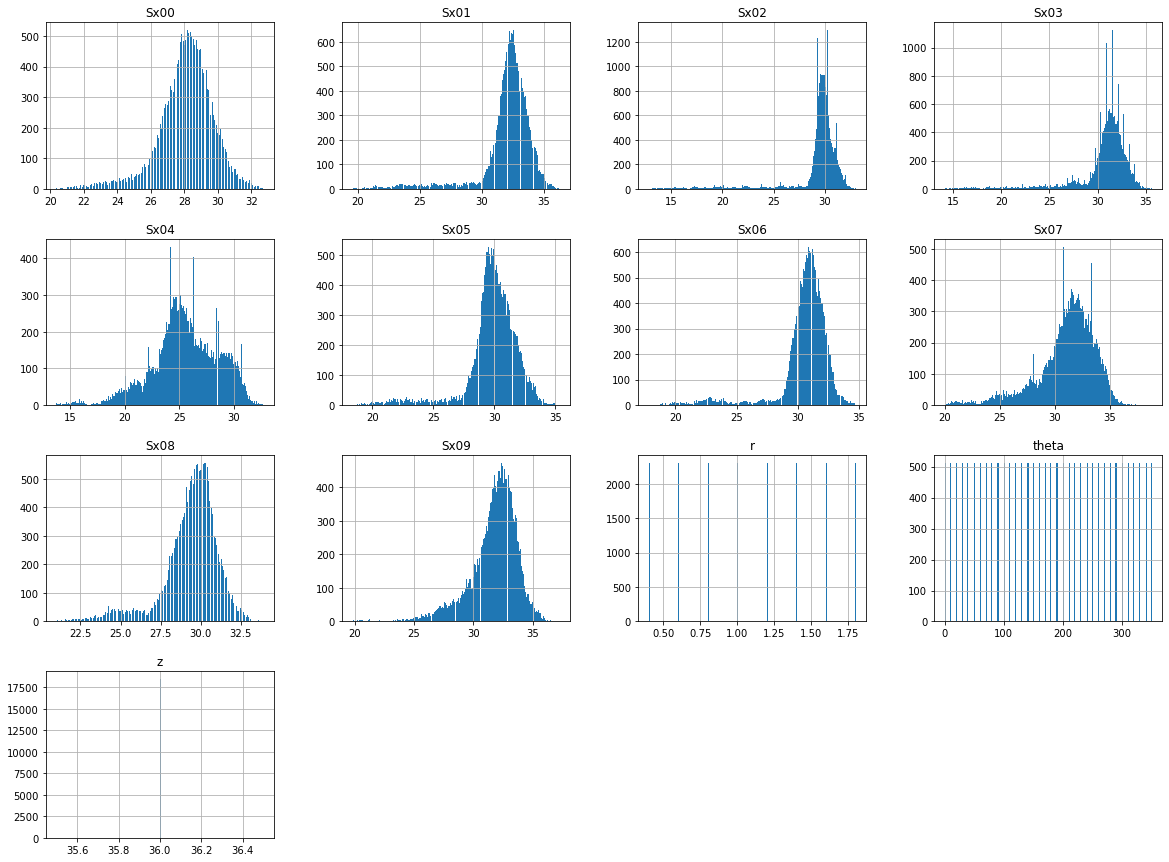

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
SensorData_extractZR.hist(bins=200, figsize=(20,15))
plt.show()

In [6]:
SensorData_extractZR.sample(20)

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,r,theta,z
208375,29.45,32.91,29.64,30.18,28.91,29.36,30.73,33.27,30.45,27.45,1.2,10.0,36
228270,24.45,35.09,30.64,33.00,25.55,29.18,31.27,32.73,27.82,31.00,1.2,320.0,36
211681,27.91,33.82,28.64,31.91,30.64,30.00,30.45,28.64,24.27,33.27,1.4,60.0,36
214791,27.18,32.55,29.18,30.18,29.73,29.55,23.82,29.09,29.91,34.45,1.2,110.0,36
214698,28.27,33.00,29.73,30.36,26.00,30.27,25.55,31.45,30.82,33.55,0.8,110.0,36
210083,30.91,33.36,29.18,31.55,24.64,29.09,29.45,30.91,29.09,31.64,0.4,40.0,36
224485,27.55,34.55,13.82,34.09,24.91,31.18,31.00,34.18,31.36,30.36,1.4,260.0,36
225626,27.64,30.27,29.82,33.64,23.45,28.91,30.82,30.55,29.45,32.27,1.0,280.0,36
210980,29.64,31.36,29.00,30.55,24.27,28.91,30.27,29.18,25.00,33.45,1.2,50.0,36
227793,26.73,23.55,31.73,34.27,31.27,30.36,28.82,31.45,29.36,34.00,1.8,310.0,36


In [8]:
X = SensorData_extractZR.iloc[:,:10]
y = SensorData_extractZR.iloc[:,11]

In [14]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly",degree = 2, C=100, epsilon = 0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

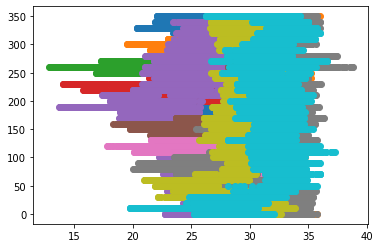

In [18]:
plt.plot(X, y,"o")

In [28]:
X[0]

KeyError: 0

In [24]:
plot_svm_regression(svm_poly_reg, X[0], y,axes=[0, 30, 0, 360])

KeyError: 0

In [20]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)